## Analysis of Airbnb Seattle:
    


### Section 1 : Understanding the business
    
There are 3 data files (in CSV format) to be looked into:

    listing.csv - includes the specifc infomation about the listing such as its neighbourhood, amenity, picture_url, host    information, review score etc.

    reviews.csv - has reviewer details including tthe listing_id and date

    calendar.csv, which includes all the listing price of the airbnb housing from 2010 to 2016

As part of this analysis, would like to answer the following questions: 

Part 1: Analyze price over other groups of features

Part 2 : How is price varying during various times of the year

Part 3 : Regress the amicable features over the price using linear model and find out the r-squared. 

In [149]:
# Importing required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
import seaborn as sns; sns.set()
%matplotlib inline

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.metrics import accuracy_score, average_precision_score, classification_report, confusion_matrix, f1_score
import statsmodels.formula.api as smf
from sklearn import metrics
from sklearn.cross_validation import train_test_split

### Section 2 : Understanding the data

#### Section 2.1 : Gather

In [150]:
seattle_lists = pd.read_csv('./listings.csv')
calendar =  pd.read_csv('./calendar.csv') 
reviews = pd.read_csv('./reviews.csv')

#### Section 2.2 : Data exploration

In [151]:
print("Total rows : {}, columns : {} ".format(seattle_lists.shape[0], seattle_lists.shape[1]))
# print(seattle_lists.head(5))

print(list(seattle_lists.columns))

Total rows : 3818, columns : 92 
['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary', 'space', 'description', 'experiences_offered', 'neighborhood_overview', 'notes', 'transit', 'thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_since', 'host_location', 'host_about', 'host_response_time', 'host_response_rate', 'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood', 'host_listings_count', 'host_total_listings_count', 'host_verifications', 'host_has_profile_pic', 'host_identity_verified', 'street', 'neighbourhood', 'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market', 'smart_location', 'country_code', 'country', 'latitude', 'longitude', 'is_location_exact', 'property_type', 'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', 'square_feet', 'price', 'weekly_price', 'monthly_price', 'securit

In [152]:
# Quantitative columns
num_cols = seattle_lists.select_dtypes([np.number]).columns
print(num_cols)

num_seattle_lists = seattle_lists[num_cols]
num_seattle_lists.describe()


Index(['id', 'scrape_id', 'host_id', 'host_listings_count',
       'host_total_listings_count', 'latitude', 'longitude', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'square_feet', 'guests_included',
       'minimum_nights', 'maximum_nights', 'availability_30',
       'availability_60', 'availability_90', 'availability_365',
       'number_of_reviews', 'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'license', 'calculated_host_listings_count',
       'reviews_per_month'],
      dtype='object')


,id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,calculated_host_listings_count,reviews_per_month
count,3.818000e+03,3.818000e+03,3.818000e+03,3816.000000,3816.000000,3818.000000,3818.000000,3818.000000,3802.000000,3812.000000,...,3171.000000,3160.000000,3165.000000,3160.000000,3167.000000,3163.000000,3162.000000,0.0,3818.000000,3191.000000
mean,5.550111e+06,2.016010e+13,1.578556e+07,7.157757,7.157757,47.628961,-122.333103,3.349398,1.259469,1.307712,...,94.539262,9.636392,9.556398,9.786709,9.809599,9.608916,9.452245,NaN,2.946307,2.078919
std,2.962660e+06,0.000000e+00,1.458382e+07,28.628149,28.628149,0.043052,0.031745,1.977599,0.590369,0.883395,...,6.606083,0.698031,0.797274,0.595499,0.568211,0.629053,0.750259,NaN,5.893029,1.822348
min,3.335000e+03,2.016010e+13,4.193000e+03,1.000000,1.000000,47.505088,-122.417219,1.000000,0.000000,0.000000,...,20.000000,2.000000,3.000000,2.000000,2.000000,4.000000,2.000000,NaN,1.000000,0.020000
25%,3.258256e+06,2.016010e+13,3.275204e+06,1.000000,1.000000,47.609418,-122.354320,2.000000,1.000000,1.000000,...,93.000000,9.000000,9.000000,10.000000,10.000000,9.000000,9.000000,NaN,1.000000,0.695000
50%,6.118244e+06,2.016010e+13,1.055814e+07,1.000000,1.000000,47.623601,-122.328874,3.000000,1.000000,1.000000,...,96.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,1.000000,1.540000
75%,8.035127e+06,2.016010e+13,2.590309e+07,3.000000,3.000000,47.662694,-122.310800,4.000000,1.000000,2.000000,...,99.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,2.000000,3.000000
max,1.034016e+07,2.016010e+13,5.320861e+07,502.000000,502.000000,47.733358,-122.240607,16.000000,8.000000,7.000000,...,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,37.000000,12.150000


In [153]:
# num_cols_of_interest = "price,host_listings_count,host_total_listings_count,bathrooms,bedrooms,beds,guests_included,\
# review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,\
# review_scores_location,review_scores_value,reviews_per_month".split(",")
# num_seattle_lists[cols].value_counts()

### Section 3 : Preparing the data

#### Determining the top 5 - 7 numerical features that influnce the price will help answer this question and will also provide the input to the model being built in the later question


#### Quantitative features assessment

Numerical (float and int types) features considered initially are :

host_listings_count,host_total_listings_count,latitude,longitude,bathrooms,bedrooms,beds,square_feet,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,reviews_per_month

Features such as id, scrape_id, host_id, license will not be considered intuitively due to the values that seem not to be correlated to the price. 

Based on the selectkbest scores, features that have scores below review_scores_cleanliness will be discarded       

In [154]:
# Quantitative features of interest

num_cols_of_interest = "price,host_listings_count,host_total_listings_count,bathrooms,bedrooms,beds,guests_included,accommodates,\
review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,\
review_scores_location,review_scores_value,reviews_per_month".split(",")

clean_num_data = seattle_lists[num_cols_of_interest]
clean_num_data['price'] = clean_num_data['price'].replace('[\$,]','',regex=True).astype(float)

# Removing the rows with nulls yielded most appropriate results than filling nulls with mean
# median, mode or other values in this case
clean_num_data = clean_num_data.dropna(axis=0)

# Imputing the most occuring values for the missing values didn't show improvement
# fill_mode = lambda col: col.fillna(col.mode()[0])

# Imputing the mode for the missing values
# clean_num_data.apply(fill_mode, axis=0)

# Reading all rows and features from clean_num_data except for price into x-axis
X = clean_num_data.iloc[:, 1:]

# Taking dependent variable price into the y-axis
y = clean_num_data.iloc[:, 0]

# Using selectkbest with chi2, pforming a fit to see the top 10 features related to price
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
featureScores = pd.concat([dfcolumns, dfscores], axis=1)
featureScores.columns = ['Feature', 'Score']
print(featureScores.nlargest(10, 'Score'))

                      Feature          Score
0         host_listings_count  112708.261118
1   host_total_listings_count  112708.261118
6                accommodates    2100.468538
4                        beds    1238.200738
5             guests_included    1124.870138
3                    bedrooms    1014.026284
14          reviews_per_month     792.697961
2                   bathrooms     396.517870
7        review_scores_rating     136.175090
9   review_scores_cleanliness      17.123854


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [155]:
# Dropping the id column which isn't useful and renaming the listing_id to id so both
# listings and reviews can be joined using the id

reviews = reviews.drop('id', axis=1)
reviews.rename(columns={'listing_id':'id'}, inplace=True)
# print(reviews.head())

# print(num_cols_of_interest)
num_cols_of_interest.append('id')
num_cols_of_interest.append('neighbourhood_group_cleansed')
seattle_cleaned = seattle_lists[num_cols_of_interest]
seattle_cleaned.head()

,price,host_listings_count,host_total_listings_count,bathrooms,bedrooms,beds,guests_included,accommodates,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month,id,neighbourhood_group_cleansed
0,$85.00,3.0,3.0,1.0,1.0,1.0,2,4,95.0,10.0,10.0,10.0,10.0,9.0,10.0,4.07,241032,Queen Anne
1,$150.00,6.0,6.0,1.0,1.0,1.0,1,4,96.0,10.0,10.0,10.0,10.0,10.0,10.0,1.48,953595,Queen Anne
2,$975.00,2.0,2.0,4.5,5.0,7.0,10,11,97.0,10.0,10.0,10.0,10.0,10.0,10.0,1.15,3308979,Queen Anne
3,$100.00,1.0,1.0,1.0,0.0,2.0,1,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7421966,Queen Anne
4,$450.00,2.0,2.0,2.0,3.0,3.0,6,6,92.0,9.0,9.0,10.0,10.0,9.0,9.0,0.89,278830,Queen Anne


In [156]:
#Relation Join : Join listings to reviews
merged_df = pd.merge(reviews, seattle_cleaned, on='id')
merged_df.head()

# Impute 0, a very small number to differentiate missing values from other values.
zero_fills = lambda col: col.fillna(0)

# Apply zero_fills to the merged dataframe
merged_fill_df = merged_df.apply(zero_fills, axis=0)
merged_fill_df['price'] = merged_fill_df['price'].replace('[\$,]','',regex=True).astype(float)
merged_fill_df['date'] = pd.to_datetime(merged_fill_df['date'])
# merged_fill_df.head()

# Features with negative values are being excluded from this analysis - there aren't any from what we can see from above
for col in merged_fill_df.columns.tolist()[1:]:
#     print(col, " - ", merged_fill_df[col].dtypes)
    if merged_fill_df[col].dtypes in ('float64', 'int64'):
        merged_fill_df = merged_fill_df.ix[merged_fill_df[col] > 0]

merged_fill_df.head()


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:18: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


,id,date,reviewer_id,reviewer_name,comments,price,host_listings_count,host_total_listings_count,bathrooms,bedrooms,...,accommodates,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month,neighbourhood_group_cleansed
0,7202016,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...,75.0,1.0,1.0,1.0,1.0,...,2,95.0,10.0,10.0,10.0,10.0,10.0,10.0,2.82,Queen Anne
1,7202016,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...,75.0,1.0,1.0,1.0,1.0,...,2,95.0,10.0,10.0,10.0,10.0,10.0,10.0,2.82,Queen Anne
2,7202016,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb...",75.0,1.0,1.0,1.0,1.0,...,2,95.0,10.0,10.0,10.0,10.0,10.0,10.0,2.82,Queen Anne
3,7202016,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...,75.0,1.0,1.0,1.0,1.0,...,2,95.0,10.0,10.0,10.0,10.0,10.0,10.0,2.82,Queen Anne
4,7202016,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...,75.0,1.0,1.0,1.0,1.0,...,2,95.0,10.0,10.0,10.0,10.0,10.0,10.0,2.82,Queen Anne


### Part 1: Analyze price over other groups of features

In [157]:
# Observing the unique values in neighbourhood_group_cleansed
merged_fill_df['neighbourhood_group_cleansed'].unique()

array(['Queen Anne', 'Central Area', 'Cascade', 'Other neighborhoods',
       'Capitol Hill', 'Ballard', 'Delridge', 'Downtown', 'West Seattle',
       'University District', 'Seward Park', 'Northgate', 'Beacon Hill',
       'Rainier Valley', 'Interbay', 'Lake City', 'Magnolia'], dtype=object)

In [158]:
# Checking unique values in the columns
print('\nRows : {}'.format(merged_fill_df.shape[0]))
print('\nColumns : {}'.format(merged_fill_df.shape[1]))
print('\nColumns : {}'.format(list(merged_fill_df.columns)))
print(' \nUnique : {}\n'.format(merged_fill_df.nunique()))


Rows : 73942

Columns : 22

Columns : ['id', 'date', 'reviewer_id', 'reviewer_name', 'comments', 'price', 'host_listings_count', 'host_total_listings_count', 'bathrooms', 'bedrooms', 'beds', 'guests_included', 'accommodates', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value', 'reviews_per_month', 'neighbourhood_group_cleansed']
 
Unique : id                               2765
date                             1890
reviewer_id                     66444
reviewer_name                   13242
comments                        73352
price                             256
host_listings_count                26
host_total_listings_count          26
bathrooms                          11
bedrooms                            7
beds                               11
guests_included                    12
accommodates                       15
review_scores_rating           

**Visualizing the data**

Text(0,0.5,'Price Count')

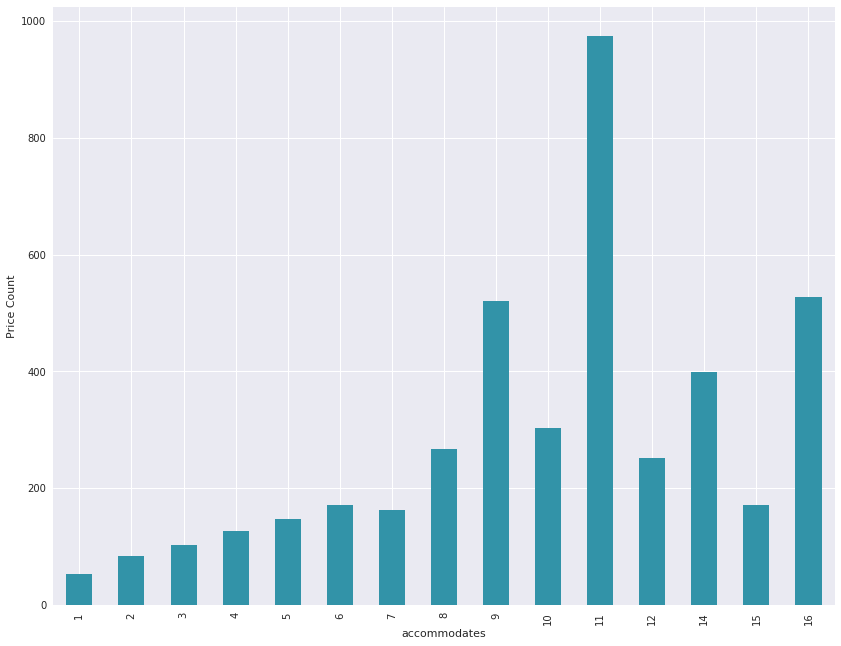

In [159]:
# matplotlib.style.use('ggplot')

merged_fill_df.columns

# Neighborhood plotted against the mean price
Accommodates_GP = merged_fill_df.groupby('accommodates').price.mean()
Accommodates_GP.plot(kind='bar', x='accommodates',
          y='price',  color = '#3293a8', figsize =(14,11), legend = False)
plt.xlabel('accommodates')
plt.ylabel('Price Count')

Text(0,0.5,'Price Count')

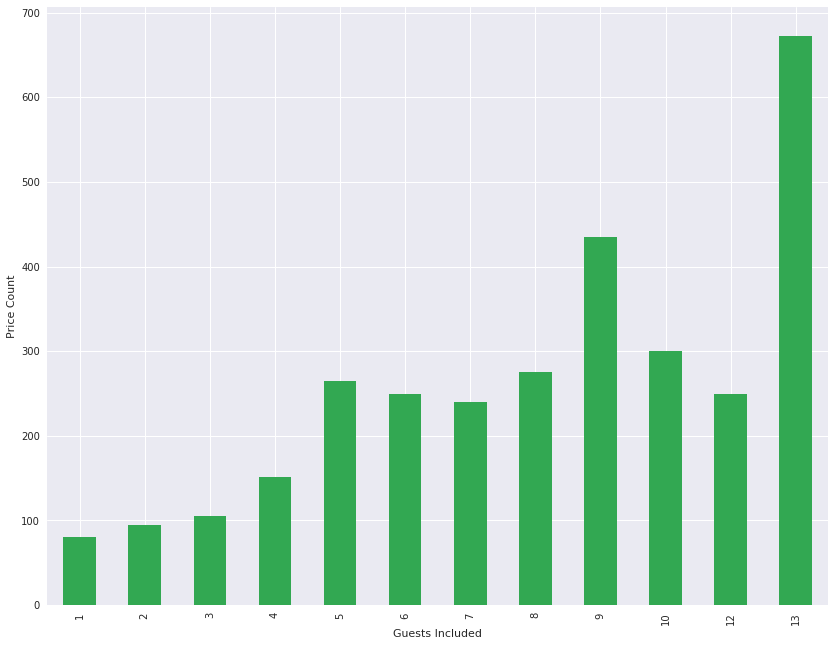

In [160]:
# Neighborhood plotted against the median price
guests_included_GP = merged_fill_df.groupby('guests_included').price.median()
guests_included_GP.plot(kind='bar', x='guests_included',
          y='price',  color = '#32a852', figsize =(14,11), legend = False)
plt.xlabel('Guests Included')
plt.ylabel('Price Count')

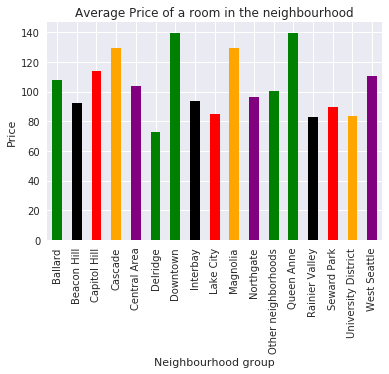

In [161]:
price_neighbourhood = merged_fill_df.groupby(['neighbourhood_group_cleansed'])['price'].agg('mean')
axis = price_neighbourhood.plot(kind = "bar", color=['green','black','red','orange','purple'])
axis.set_ylabel('Price')
axis.set_xlabel('Neighbourhood group')

plt.title('Average Price of a room in the neighbourhood')
plt.show()

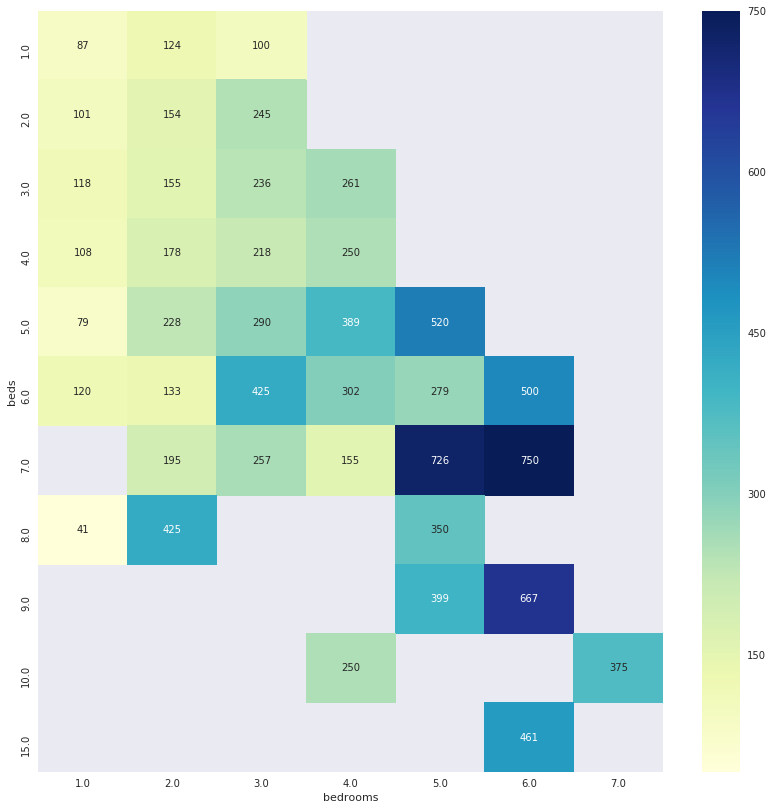

In [162]:
# heatmap using 'neighbourhood_group_cleansed', 'bedrooms' against mean of the price
plt.figure(figsize=(14,14))
sns.heatmap(merged_fill_df.groupby([
        'beds', 'bedrooms']).price.mean().unstack(),cmap = 'YlGnBu',annot=True, fmt=".0f");

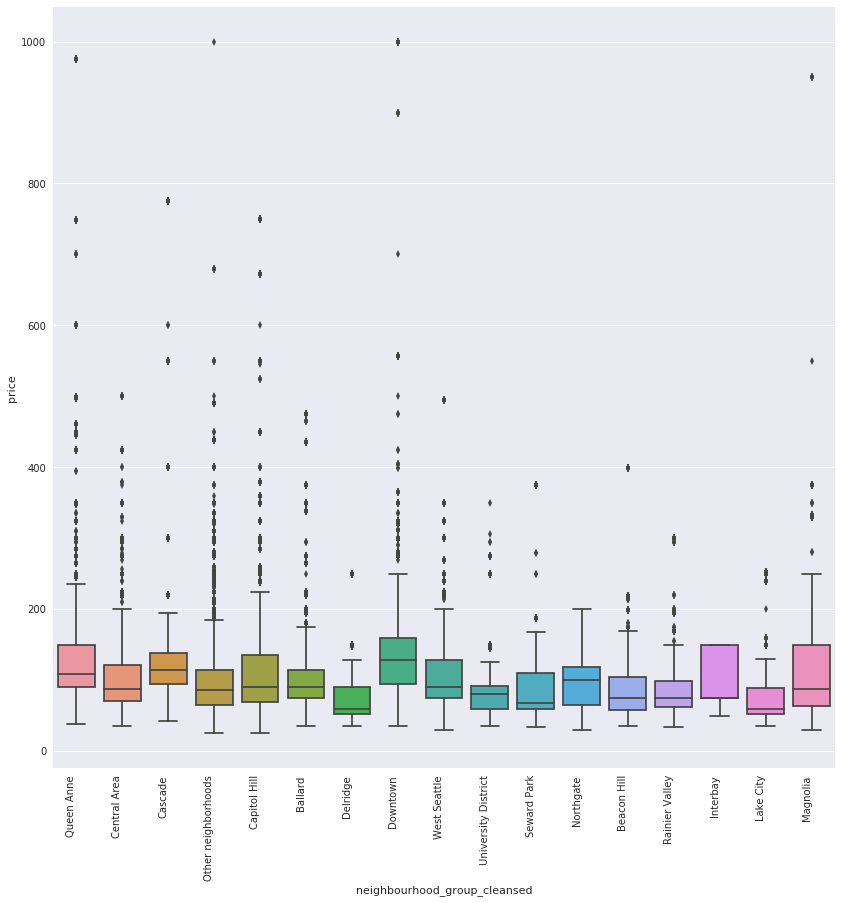

In [163]:
# Explorer the correlation between price and neighbourhood group cleansed further

plt.figure(figsize=(14,14))
sns.boxplot(x='neighbourhood_group_cleansed',y='price',data=merged_fill_df)
ax=plt.gca()
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='right')
plt.show()


In [164]:
# Analyzing other features
num_cols = "property_type,room_type,price,weekly_price,monthly_price".split(",")

# selecting data for limited features
seattle_lists_few= seattle_lists[num_cols]

# Converting string classes to float type for price, weekly_price and monthly_price
seattle_lists_few['price'] = seattle_lists['price'].replace('[\$,]', '', regex=True).astype(float)
seattle_lists_few['weekly_price'] = seattle_lists['weekly_price'].replace('[\$,]', '', regex=True).astype(float)
seattle_lists_few['monthly_price'] = seattle_lists['monthly_price'].replace('[\$,]', '', regex=True).astype(float)

# Summarizing data by room_type and calculating mean, min and max of all numerical features
res1 = seattle_lists_few.groupby(["room_type"], sort=True) \
.agg({'price' : ['mean','min','max'], 'weekly_price' : ['mean','min','max'], 'monthly_price' : ['mean','min','max']});

# Summarizing data by property_type and calculating mean, min and max of all numerical features
res2 = seattle_lists_few.groupby(["property_type"], sort=True) \
         .agg({'price' : ['mean','min','max']});

# Sorting the data by mean from both result sets
print(res1.sort_values([('price', 'mean')], ascending=False))
print(res2.sort_values([('price', 'mean')], ascending=False))

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


                      price               weekly_price                 \
                       mean   min     max         mean    min     max   
room_type                                                               
Entire home/apt  155.843369  39.0  1000.0   960.996255  250.0  6300.0   
Private room      75.044828  20.0   399.0   462.566775  100.0  2500.0   
Shared room       47.547009  22.0   118.0   285.233333  150.0   915.0   

                monthly_price                  
                         mean    min      max  
room_type                                      
Entire home/apt   3138.630814  800.0  19500.0  
Private room      1556.602273  500.0   9000.0  
Shared room        899.088889  550.0   2400.0  
                      price               
                       mean    min     max
property_type                             
Boat             282.375000   75.0   775.0
Condominium      151.109890   50.0   700.0
Loft             135.700000   25.0   425.0
House          

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


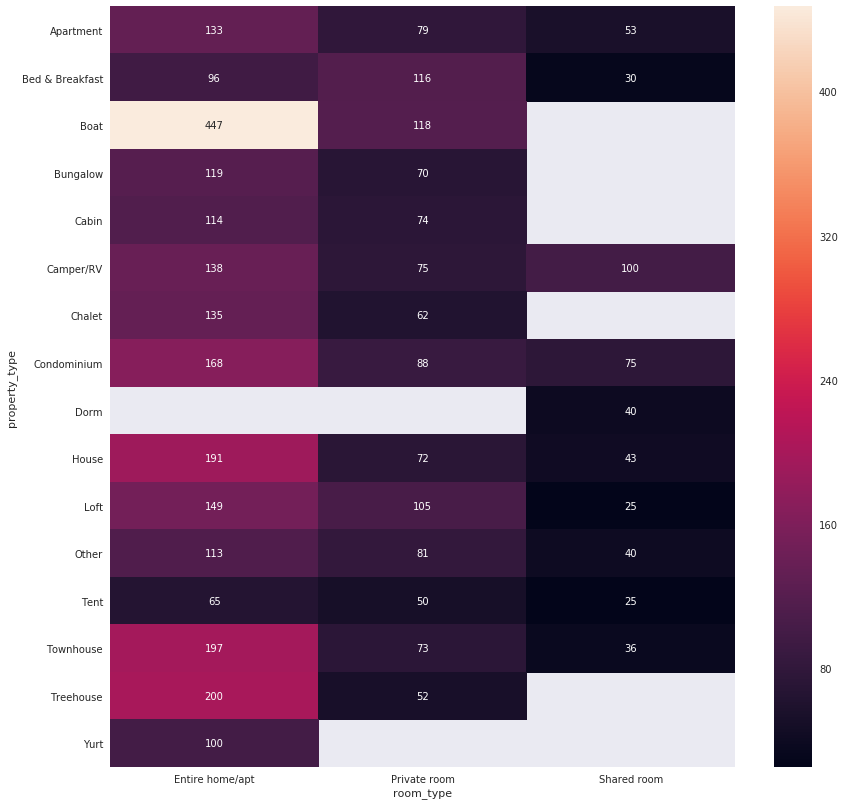

In [165]:
# Deeper look into property_type and room_type vs price
import seaborn as sns

plt.figure(figsize=(14, 14))
sns.heatmap(seattle_lists_few.groupby(['property_type', 'room_type']).price.mean().unstack(), annot=True, fmt='.0f');

# sns.heatmap(merged_fill_df.groupby([
#         'neighbourhood_group_cleansed', 'bedrooms']).price.mean().unstack(),cmap = 'RdYlGn_r',annot=True, fmt=".0f")

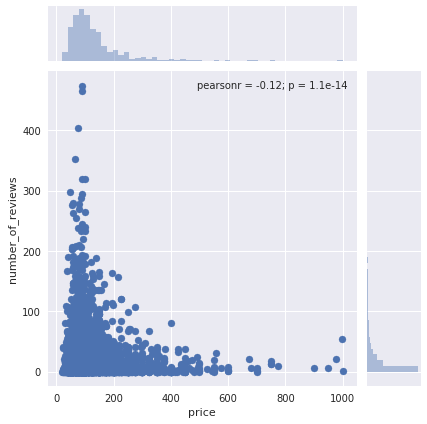

In [166]:
# What's the correlation between price and # of reviews

# seattle_lists[['price','number_of_reviews']].head()

# seattle_lists.columns
# plt.subplots(figsize=(12,12))
seattle_lists['price'] = seattle_lists['price'].replace('[\$,]','',regex=True).astype(float)
price_reviews=seattle_lists[['price','number_of_reviews']]
# plt.figure(figsize=(16, 16))


sns.jointplot('price','number_of_reviews',data=price_reviews);

In [167]:
# Does latitude and longitude have any influence on the price?

# geo_cols_of_interest = "price,longitude,latitude".split(",")

clean_geo_data = seattle_lists[['latitude','longitude','price','minimum_nights','number_of_reviews','reviews_per_month','availability_365','calculated_host_listings_count']]
clean_geo_data = clean_geo_data.dropna(axis=0)
clean_geo_data['price'] = clean_geo_data['price'].replace('[\$,]','',regex=True).astype(float)

In [168]:
clean_geo_data.head()

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,availability_365,calculated_host_listings_count
0,47.636289,-122.371025,85.0,1,207,4.07,346,2
1,47.639123,-122.365666,150.0,2,43,1.48,291,6
2,47.629724,-122.369483,975.0,4,20,1.15,220,2
4,47.632918,-122.372471,450.0,1,38,0.89,365,1
5,47.630525,-122.366174,120.0,1,17,2.45,302,1


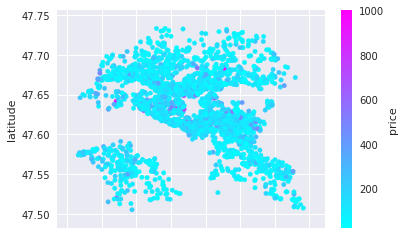

In [169]:
clean_geo_data.plot.scatter(x='longitude', y='latitude', c='price',cmap='cool');

In [170]:
# X be the independent variable and y the dependent variable

X = clean_geo_data.iloc[:, :-1].values

y = clean_geo_data.iloc[:,-1].values

In [171]:
len(X)

3191

In [172]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 20, random_state = 0)
regressor.fit(X,y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=1,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [173]:
# Predicting the Test set results
y_pred = regressor.predict(X)
y_pred

array([ 1.7 ,  5.  ,  1.95, ...,  2.45,  4.2 ,  1.3 ])

In [174]:
regressor.score(X,y)

0.9200098445676983

### Section 5 : Evaluating the results ( #4 is skipped since there's no modelling involved here)

Price seems to vary based on the geo location. Locations closer to Capitol Hill, Central Area, Downturn, Ballard particularly have higher price range. With each additional bedroom, the price seem to go up anywhere from 25% - 100% in places like Downtown, Central Area, Capitol Hill, Queen Anne and West Seattle. It appears that these popular locations also see high occupany among other locations in Seattle and therefore are demanding higher price per night.

Another takeaway from these plots is that the more people the rental property can accommodate and higher the bedrooms, higher the price.

Other features that have sizeable influence on price is the property_type, room_type, neighborhood_cleansed. host_listings_count, accommodates, host_total_listings_count, beds, guests_included and bedrooms have the strongest positive correlation to price. It is also observed that better the review scores are lesser the property prices - showing that the guests look for economical options when they choose airbnb. Lesser price is basically appreciated. We need to check what is it that the high priced properties have in them making the price higher.


## Part 2 - How is the price varying during various times of the year?

In [175]:
# Evaluating date and price for this analysis. Null values have been addressed earlier!

print(merged_fill_df.shape)

merged_fill_df.price.unique()

(73942, 22)


array([   75.,    90.,    55.,    65.,   100.,    40.,    49.,    93.,
         129.,   135.,    60.,   180.,    85.,   150.,    94.,    69.,
         225.,   175.,   169.,   119.,   110.,    95.,   156.,   101.,
          89.,   120.,    50.,    62.,   245.,    30.,    84.,    42.,
         260.,   122.,   209.,    80.,   300.,   219.,   249.,    97.,
         170.,   144.,   348.,   215.,   350.,    37.,    39.,   139.,
         189.,   165.,    70.,   149.,   115.,   168.,   250.,    64.,
          58.,   151.,   179.,   127.,    59.,    68.,   125.,   200.,
         195.,   105.,    99.,   239.,   188.,   259.,   108.,   155.,
         257.,    51.,   280.,    82.,   140.,   600.,   950.,   395.,
          34.,    45.,   359.,   680.,   275.,    53.,   130.,   128.,
         375.,   145.,   265.,    79.,   126.,   116.,   220.,    66.,
          67.,   142.,    87.,   557.,   190.,    91.,   550.,   193.,
          63.,    81.,   182.,    41.,   450.,   210.,   117.,   196.,
      

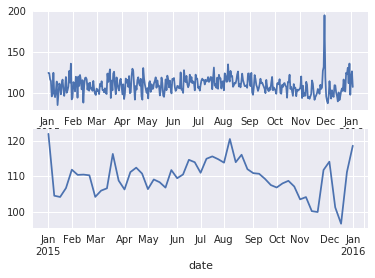

In [178]:
# Plotting dates greater than Jan 2015 against price
merged_fill_df = merged_fill_df[merged_fill_df['date'] > '2015-01-01']
pricedf = merged_fill_df.groupby(['date'])['price'].mean()

plt.subplot(211)
pricedf.resample('D').mean().plot()
plt.subplot(212)
pricedf.resample('W').mean().plot()

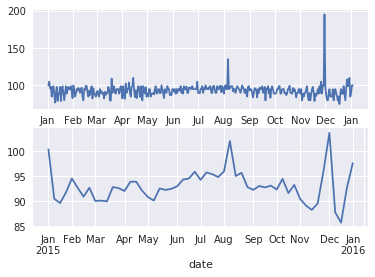

In [179]:
pricedf = merged_fill_df.groupby(['date'])['price'].median()
plt.subplot(211)
pricedf.resample('D').mean().plot()
plt.subplot(212)
pricedf.resample('W').mean().plot()

### Evaluating the results

Assessed 2015/2016 data only and the trend is quite clear. 

As we could see from the line graph, it seems that the busiest season of Seattle in a year is around December/NewYear into January time and again in summer, the price keeps going high from December into January with peak (117 average, 99 median) and reached high again in July/August timeframe. The average of the listing price increased by 25% compared to the low time of the year.



## Part 3 - Regress the features with positive correlation over the price using linear model and find out the r-squared?

### Categorical features assessment

Have employed various methods such as visually verifying the data, plotting the data for example using sns.pairplot and heatmaps, much of the categorical feature have been removed because they are either url's or free form text. Most of the categorial features have several hundred classes in them for example, such as listing_url, space, summary, name etc have hundreds of classes which will not help in identifying the relation to the price. Features such as property_type which has about 15 unique classes and likewise other categorical features have been considered for the model. 

**All categorical variables have been verified for data completeness and validity**

**Quantitative variables studied above have been chosen for the model**

In [180]:
cols = ['host_has_profile_pic', 'host_identity_verified','room_type', 'bed_type', 'price', 'instant_bookable',
       'cancellation_policy', 'require_guest_phone_verification']

cat_cols_fin = []
# Excluding features that have more than 15 unique classes within, except for the depedent variable price

for c in cols:
    if seattle_lists[c].nunique() < 15 or c == 'price':
        cat_cols_fin.append(c)
    else:
        print("\nexcluding - ", c, " - ", seattle_lists[c].nunique(), '\n')

# Numerical features considered based on the score from the above step        
num_cols = ['beds', 'bedrooms', 'bathrooms', 'review_scores_rating', 'host_listings_count' ]

# Merging numerical and categorical features
cat_cols_fin.extend(num_cols)

'''
There are a total of 21 cols identified that has greater degree of correlation with the price

In the next step, these cols are being fed into a func which will further create dummy cols for all 
categorical variables
'''


# #start clean up 
print(cat_cols_fin, len(cat_cols_fin))
print(seattle_lists[cat_cols_fin].head())


['host_has_profile_pic', 'host_identity_verified', 'room_type', 'bed_type', 'price', 'instant_bookable', 'cancellation_policy', 'require_guest_phone_verification', 'beds', 'bedrooms', 'bathrooms', 'review_scores_rating', 'host_listings_count'] 13
  host_has_profile_pic host_identity_verified        room_type  bed_type  \
0                    t                      t  Entire home/apt  Real Bed   
1                    t                      t  Entire home/apt  Real Bed   
2                    t                      t  Entire home/apt  Real Bed   
3                    t                      t  Entire home/apt  Real Bed   
4                    t                      t  Entire home/apt  Real Bed   

   price instant_bookable cancellation_policy  \
0   85.0                f            moderate   
1  150.0                f              strict   
2  975.0                f              strict   
3  100.0                f            flexible   
4  450.0                f              strict   

 

In [181]:
# This function will assist in cleaning up the dataset

def clean_data(df, col_list, incl_dependent=False):
    '''
    INPUT
    df - pandas dataframe 
    
    OUTPUT
    X - A matrix holding all of the variables you want to consider when predicting the response
    y - the corresponding response vector
    
    This function cleans df using the following steps to produce X and y:
    1. Drop all the rows with NaN values
    2. Create X as all the columns that is not the Price column
    3. Create y as the Price column
    4. Drop the Price columns from X
    5. For each numeric variable in X, fill the column with the mean value of the column.
    6. Create dummy columns for all the categorical variables in X, drop the original columns
    '''
    
    # Convert price from string to float 
    y = df['price'].replace('[\$,]', '', regex=True).astype(float)
    
    #Taking just those features that are finalized (from the step above)
    df = df[col_list]
    
    # Fill numeric columns with the mean
    num_vars = df.select_dtypes(include=['float', 'int']).columns
    for col in num_vars:
        df[col].fillna((df[col].mean()), inplace=True)
        
    # Dummy the categorical variables except for the price
    cat_vars = df.select_dtypes(include=['object']).copy().columns
    for var in  cat_vars:
        if var != 'price':
        # for each cat add dummy var, drop original column
            df = pd.concat([df.drop(var, axis=1), pd.get_dummies(df[var], prefix=var, prefix_sep='_', drop_first=True)], axis=1)
    
#     Removing the price from the dataframe df
    if incl_dependent:
        df['price'] = df['price'].replace('[\$,]', '', regex=True).astype(float)
    else:
        del df['price']

    X = df
    return X, y
    
#Use the function to create X and y
# print(cat_cols_fin)
X, y = clean_data(seattle_lists, cat_cols_fin)
# print(X.head())

/opt/conda/lib/python3.6/site-packages/pandas/core/generic.py:5434: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [182]:
'''
Linear model to help regress the features considered onto the price
'''

# Split data into training and test data, and fit a linear model
X_2_train, X_2_test, y_2_train, y_2_test = train_test_split(X, y , test_size=.30, random_state=42)
lm_2_model = LinearRegression(normalize=True)

# print(X_2_train.columns)

# If our model works, it should just fit our model to the data. Otherwise, it will let us know.
try:
    lm2 = lm_2_model.fit(X_2_train, y_2_train)
    print(lm2.intercept_)
    print(lm2.coef_)
    
except Exception as e:
    print(e)
    print("Didn't work!!!")
    

13.7497185899
[  9.89987034e+00   3.13979348e+01   3.53225713e+01   4.56271397e-01
   5.01057060e-02  -1.19237986e+01  -4.64532990e-01  -5.06654223e+01
  -8.20915073e+01   8.90592191e+00  -3.15020227e+00  -9.58599295e-01
   7.56639912e-01  -5.92740961e+00  -9.02169033e+00   1.57505630e+00
   8.85199462e+00]


In [183]:
# Verifying the results and r2 score

y_test_preds = lm_2_model.predict(X_2_test)# Predictions here
r2_test = r2_score(y_2_test, y_test_preds) # Rsquared here

# Print r2 to see result
r2_test

0.55435727215236219

### Evaluating the results

It appears that 55% of the variability of the price can be explained by the features considered and the remaining 45%
variability may or may not be explained with the dataset considered.

To further enhance the prediction accuracy, the reviews data may be incorporated! It may contain useful information such as the number of reviews made by return customers and the keywords leading to high review scores.